$LL(\theta) = y^{(i)}log(h_\theta x^{(i)}) + (1 - y^{(i)})log(1 - h_\theta x^{(i)})$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
le = LabelEncoder()

In [3]:
data = pd.read_csv("../Kaggle/Datasets/all (LogReg)/Train.csv")
d2 = pd.read_csv("../Kaggle/Datasets/all (LogReg)/Test.csv")

# print(data.shape)
# print(data.columns)

In [4]:
data.isna().sum()
d2.isna().sum()

pclass         0
name           0
sex            0
age           66
sibsp          0
parch          0
ticket         0
fare           0
cabin        234
embarked       1
boat         188
body         277
home.dest    137
dtype: int64

In [5]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,3.0,0.0,"O'Donoghue, Ms. Bridget",female,NaN,0.0,0.0,364856,7.750,NaN,Q,NaN,NaN,NaN
1,2.0,0.0,"Morley, Mr. Henry Samuel (""Mr Henry Marshall"")",male,39.0,0.0,0.0,250655,26.000,NaN,S,NaN,NaN,NaN
2,2.0,1.0,"Smith, Miss. Marion Elsie",female,40.0,0.0,0.0,31418,13.000,NaN,S,9,NaN,NaN
3,3.0,1.0,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1.0,1.0,363291,20.525,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI"
4,3.0,1.0,"McCoy, Miss. Agnes",female,NaN,2.0,0.0,367226,23.250,NaN,Q,16,NaN,NaN


In [6]:
# age => mean
# fare => median
# cabin => mode
# embarked => mode
# boat => mode
# body => mean?
# home.dest => drop?

data['age'].fillna(value=data['age'].mean(), inplace=True)
data['fare'].fillna(value=data['fare'].median(), inplace=True)
data['cabin'].fillna(value=np.random.choice(data['cabin'].mode()), inplace=True)
data['embarked'].fillna(value=data['embarked'].mode().iloc[0], inplace=True)
data['boat'].fillna(value=data['boat'].mode().iloc[0], inplace=True)
data['body'].fillna(value=data['body'].mean(), inplace=True)
data.drop('home.dest', axis=1, inplace=True)


d2['age'].fillna(value=d2['age'].mean(), inplace=True)
d2['fare'].fillna(value=d2['fare'].median(), inplace=True)
d2['cabin'].fillna(value=np.random.choice(d2['cabin'].mode()), inplace=True)
d2['embarked'].fillna(value=d2['embarked'].mode().iloc[0], inplace=True)
d2['boat'].fillna(value=d2['boat'].mode().iloc[0], inplace=True)
d2['body'].fillna(value=d2['body'].mean(), inplace=True)
d2.drop('home.dest', axis=1, inplace=True)

In [7]:
data['sex'] = le.fit_transform(data['sex'])
data['name'] = le.fit_transform(data['name'])
data['ticket'] = le.fit_transform(data['ticket'])
data['cabin'] = le.fit_transform(data['cabin'])
data['embarked'] = le.fit_transform(data['embarked'])
data['boat'] = le.fit_transform(data['boat'])


d2['sex'] = le.fit_transform(d2['sex'])
d2['name'] = le.fit_transform(d2['name'])
d2['ticket'] = le.fit_transform(d2['ticket'])
d2['cabin'] = le.fit_transform(d2['cabin'])
d2['embarked'] = le.fit_transform(d2['embarked'])
d2['boat'] = le.fit_transform(d2['boat'])

In [8]:
'''plt.scatter(X_tr[:,7], Y_tr[:], c=Y_tr.reshape((-1,)))
# plt.xlabel()
plt.show()'''

'plt.scatter(X_tr[:,7], Y_tr[:], c=Y_tr.reshape((-1,)))\n# plt.xlabel()\nplt.show()'

In [9]:
for col in data.columns:
    print(col, len(data[col].value_counts()))

pclass 3
survived 2
name 1007
sex 2
age 97
sibsp 7
parch 8
ticket 751
fare 251
cabin 155
embarked 3
boat 25
body 99


In [10]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,3.0,0.0,668,0,29.838978,0.0,0.0,482,7.750,153,1,22,164.489796
1,2.0,0.0,620,1,39.000000,0.0,0.0,185,26.000,153,2,22,164.489796
2,2.0,1.0,848,0,40.000000,0.0,0.0,281,13.000,153,2,19,164.489796
3,3.0,1.0,358,0,31.000000,1.0,1.0,468,20.525,153,2,23,164.489796
4,3.0,1.0,586,0,29.838978,2.0,0.0,489,23.250,153,1,9,164.489796


In [11]:
d2.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1.0,84,1,36.000000,0.0,0.0,229,26.3875,49,2,13,145.130435
1,3.0,254,0,30.027422,8.0,2.0,224,69.5500,15,2,6,145.130435
2,1.0,240,1,30.027422,0.0,0.0,9,50.0000,2,2,6,145.130435
3,2.0,94,1,34.000000,0.0,0.0,24,13.0000,15,2,6,145.130435
4,2.0,51,1,28.000000,0.0,0.0,67,13.0000,15,2,6,145.130435


In [12]:
a = data['name']
b = d2['name']
print(a.min(), a.max())
print(b.min(), b.max())
data['name'] = np.interp(a, (a.min(), a.max()), (0.0, 100.6))
d2['name'] = np.interp(b, (b.min(), b.max()), (0.0, 29.9))
d2.head()

0 1006
0 299


,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1.0,8.4,1,36.000000,0.0,0.0,229,26.3875,49,2,13,145.130435
1,3.0,25.4,0,30.027422,8.0,2.0,224,69.5500,15,2,6,145.130435
2,1.0,24.0,1,30.027422,0.0,0.0,9,50.0000,2,2,6,145.130435
3,2.0,9.4,1,34.000000,0.0,0.0,24,13.0000,15,2,6,145.130435
4,2.0,5.1,1,28.000000,0.0,0.0,67,13.0000,15,2,6,145.130435


In [13]:
a = data['ticket']
b = d2['ticket']
print(a.min(), a.max())
print(b.min(), b.max())
data['ticket'] = np.interp(a, (a.min(), a.max()), (0.0, 75))
d2['ticket'] = np.interp(b, (b.min(), b.max()), (0.0, 27.8))
data.head()

0 750
0 278


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,3.0,0.0,66.8,0,29.838978,0.0,0.0,48.2,7.750,153,1,22,164.489796
1,2.0,0.0,62.0,1,39.000000,0.0,0.0,18.5,26.000,153,2,22,164.489796
2,2.0,1.0,84.8,0,40.000000,0.0,0.0,28.1,13.000,153,2,19,164.489796
3,3.0,1.0,35.8,0,31.000000,1.0,1.0,46.8,20.525,153,2,23,164.489796
4,3.0,1.0,58.6,0,29.838978,2.0,0.0,48.9,23.250,153,1,9,164.489796


In [14]:
a = data['body']
b = d2['body']
print(a.min(), a.max())
print(b.min(), b.max())
data['body'] = np.interp(a, (a.min(), a.max()), (1.0, 32.8))
d2['body'] = np.interp(b, (b.min(), b.max()), (9.0, 32.2))
data.head()

1.0 328.0
9.0 322.0


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,3.0,0.0,66.8,0,29.838978,0.0,0.0,48.2,7.750,153,1,22,16.899008
1,2.0,0.0,62.0,1,39.000000,0.0,0.0,18.5,26.000,153,2,22,16.899008
2,2.0,1.0,84.8,0,40.000000,0.0,0.0,28.1,13.000,153,2,19,16.899008
3,3.0,1.0,35.8,0,31.000000,1.0,1.0,46.8,20.525,153,2,23,16.899008
4,3.0,1.0,58.6,0,29.838978,2.0,0.0,48.9,23.250,153,1,9,16.899008


In [15]:
a = data['age']
b = d2['age']
print(a.min(), a.max())
print(b.min(), b.max())
data['age'] = np.interp(a, (a.min(), a.max()), (0.0, 80))
d2['age'] = np.interp(b, (b.min(), b.max()), (0.0, 71))
data.head()

0.3333 80.0
0.1667 71.0


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,3.0,0.0,66.8,0,29.629120,0.0,0.0,48.2,7.750,153,1,22,16.899008
1,2.0,0.0,62.0,1,38.828469,0.0,0.0,18.5,26.000,153,2,22,16.899008
2,2.0,1.0,84.8,0,39.832653,0.0,0.0,28.1,13.000,153,2,19,16.899008
3,3.0,1.0,35.8,0,30.795000,1.0,1.0,46.8,20.525,153,2,23,16.899008
4,3.0,1.0,58.6,0,29.629120,2.0,0.0,48.9,23.250,153,1,9,16.899008


In [16]:
a = data['boat']
b = d2['boat']
print(a.min(), a.max())
print(b.min(), b.max())
data['boat'] = np.interp(a, (a.min(), a.max()), (0.0, 24))
d2['boat'] = np.interp(b, (b.min(), b.max()), (0.0, 23))
data.head()

0 24
0 23


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,3.0,0.0,66.8,0,29.629120,0.0,0.0,48.2,7.750,153,1,22.0,16.899008
1,2.0,0.0,62.0,1,38.828469,0.0,0.0,18.5,26.000,153,2,22.0,16.899008
2,2.0,1.0,84.8,0,39.832653,0.0,0.0,28.1,13.000,153,2,19.0,16.899008
3,3.0,1.0,35.8,0,30.795000,1.0,1.0,46.8,20.525,153,2,23.0,16.899008
4,3.0,1.0,58.6,0,29.629120,2.0,0.0,48.9,23.250,153,1,9.0,16.899008


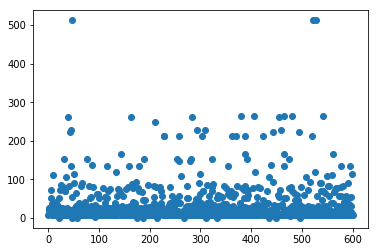

In [17]:
plt.scatter(np.linspace(0,600,1009), data['fare'])

In [18]:
a = data['fare']
b = d2['fare']
print(a.min(), a.max())
print(b.min(), b.max())
data['fare'] = np.interp(a, (a.min(), a.max()), (0.0, 51.2))
d2['fare'] = np.interp(b, (b.min(), b.max()), (0.0, 51.2))
data.head()

0.0 512.3292
0.0 512.3292


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,3.0,0.0,66.8,0,29.629120,0.0,0.0,48.2,0.774502,153,1,22.0,16.899008
1,2.0,0.0,62.0,1,38.828469,0.0,0.0,18.5,2.598329,153,2,22.0,16.899008
2,2.0,1.0,84.8,0,39.832653,0.0,0.0,28.1,1.299165,153,2,19.0,16.899008
3,3.0,1.0,35.8,0,30.795000,1.0,1.0,46.8,2.051181,153,2,23.0,16.899008
4,3.0,1.0,58.6,0,29.629120,2.0,0.0,48.9,2.323506,153,1,9.0,16.899008


In [19]:
a = data['cabin']
b = d2['cabin']
print(a.min(), a.max())
print(b.min(), b.max())
data['cabin'] = np.interp(a, (a.min(), a.max()), (0.0, 15.4))
d2['cabin'] = np.interp(b, (b.min(), b.max()), (0.0, 5.8))
data.head()

0 154
0 58


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,3.0,0.0,66.8,0,29.629120,0.0,0.0,48.2,0.774502,15.3,1,22.0,16.899008
1,2.0,0.0,62.0,1,38.828469,0.0,0.0,18.5,2.598329,15.3,2,22.0,16.899008
2,2.0,1.0,84.8,0,39.832653,0.0,0.0,28.1,1.299165,15.3,2,19.0,16.899008
3,3.0,1.0,35.8,0,30.795000,1.0,1.0,46.8,2.051181,15.3,2,23.0,16.899008
4,3.0,1.0,58.6,0,29.629120,2.0,0.0,48.9,2.323506,15.3,1,9.0,16.899008


In [20]:
print(min(data['ticket']), max(data['ticket']))
print(min(d2['ticket']), max(d2['ticket']))

0.0 75.0
0.0 27.8


In [21]:
d2.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1.0,8.4,1,35.917631,0.0,0.0,22.9,2.637054,4.9,2,13.0,19.090179
1,3.0,25.4,0,29.930996,8.0,2.0,22.4,6.950531,1.5,2,6.0,19.090179
2,1.0,24.0,1,29.930996,0.0,0.0,0.9,4.996787,0.2,2,6.0,19.090179
3,2.0,9.4,1,33.912924,0.0,0.0,2.4,1.299165,1.5,2,6.0,19.090179
4,2.0,5.1,1,27.898803,0.0,0.0,6.7,1.299165,1.5,2,6.0,19.090179


In [23]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,3.0,0.0,66.8,0,29.629120,0.0,0.0,48.2,0.774502,15.3,1,22.0,16.899008
1,2.0,0.0,62.0,1,38.828469,0.0,0.0,18.5,2.598329,15.3,2,22.0,16.899008
2,2.0,1.0,84.8,0,39.832653,0.0,0.0,28.1,1.299165,15.3,2,19.0,16.899008
3,3.0,1.0,35.8,0,30.795000,1.0,1.0,46.8,2.051181,15.3,2,23.0,16.899008
4,3.0,1.0,58.6,0,29.629120,2.0,0.0,48.9,2.323506,15.3,1,9.0,16.899008


In [24]:
alldata = data.values

X_ts = d2.values

print("train XY:", alldata.shape)
print("test X:", X_ts.shape)

Y_tr = alldata[:, 1].reshape((-1, 1))
print("train Y:", Y_tr.shape)

X1 = alldata[:, 0].reshape((-1, 1))
X2 = alldata[:, 2:]

# print(X1.shape, X2.shape)
X_tr = np.hstack((X1, X2))

print("train X & Y:", X_tr.shape, Y_tr.shape)

train XY: (1009, 13)
test X: (300, 12)
train Y: (1009, 1)
train X & Y: (1009, 12) (1009, 1)


In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
lr = LogisticRegression()
yt = Y_tr.reshape(Y_tr.shape[0], )
lr.fit(X_tr, yt)
print(lr.coef_, lr.intercept_)
lr.score(X_tr, yt)

[[-0.08918119  0.00277593 -2.03871735  0.00878043 -0.16421411 -0.14790482
  -0.0120731   0.07840276  0.07047195 -0.37382563 -0.42406048  0.12300805]] [6.42433906]


/Users/riagupta/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9137760158572844

In [27]:
def hypothesis(x, w, b):
#     print(w)
#     print(x)
    return sigmoid(np.dot(x, w) + b)

def sigmoid(z):
#     print(z)
    z = z/10
    return 1.0/(1.0 + np.exp(-1.0*z))

def error(X, Y, w, b):
    m = X.shape[0]
    err = 0.0
    
    for i in range(m):
        hx = hypothesis(X[i], w, b)
#         print(hx)
        v = (Y[i]*np.log2(1.0*hx) + (1-Y[i])*np.log2(1.0-hx))
        err += v
#         print(v)
    return -err/m 

def get_gradient(X, Y, w, b, batch_size = 1):
    m = X.shape[0]
    grad_w = np.zeros(w.shape)
    grad_b = 0
    
#     indices = np.arange(m)
#     np.random.shuffle(indices)
#     indices = indices[:batch_size]
    
    for i in range(m):
        hx = hypothesis(X[i], w, b)
        grad_w += (Y[i] - hx)*X[i]
        grad_b += (Y[i] - hx)
        
    return grad_w/m, grad_b/m

def gradientDescent(X, Y, lr=0.01):
    w = np.random.random(X.shape[1])
#     w = np.zeros(X.shape[1])
    b = np.random.random()
    
    error_list = []
    
    for i in range(1000):
        grad_w, grad_b = get_gradient(X, Y, w, b)
        w = w + lr*grad_w
        b = b + lr*grad_b
        err = error(X, Y, w, b)
#         if (i%10):
        error_list.append(err)
#         acc_list.append(get_accuracy())
    return error_list, w, b

def predict(x, w, b):
    confidence = hypothesis(x, w, b)
    if confidence < 0.5:
        return 0.0
    else:
        return 1.0
    
def get_accuracy(x_test, y_test, w, b):
    y_pred = []
    for i in range(y_test.shape[0]):
        y_pred.append(predict(x_test[i], w, b))
        
    y_pred = np.array(y_pred)
    y_test = y_test.reshape((-1,))
#     print(y_pred)
#     print(y_test)
#     print((y_test.reshape((-1,))))
#     print(matches, y_test.shape[0])
#     print(y_pred == y_test)
    return float((y_pred == y_test).sum())/y_test.shape[0]

In [28]:
def test(X, w, b):
    y_test = []
    for i in range(X.shape[0]):
        y_test.append(predict(X[i], w, b))
    return y_test

In [29]:
error_list, final_w, final_b = gradientDescent(X_tr, Y_tr)
print(final_w, final_b)

[ 0.86207894  0.03985651  0.16631416  0.17767473  0.3452939   0.31584617
 -0.09431913  1.3259829   0.65545037  0.59379528 -3.01650202  1.66013594] [0.91641442]


0.8533201189296333


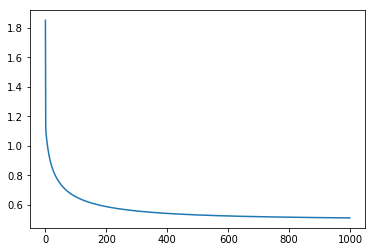

[0.51202829]
1000


In [30]:
# [ 0.24836312  0.041863    0.09004341  0.13671924  0.20206188  0.73954058
#  -0.06090373  1.0056842   1.37618127  0.04543449 -2.90029744  1.6728166 ] [0.95963339]

# [[ 0.09045862  0.00252709 -2.04235879  0.00800854 -0.15498885 -0.1511889
#   -0.01172079  0.00646826  0.01550381 -0.37674759 -0.4228957   0.01070201]] [6.28751403]

print(get_accuracy(X_tr, Y_tr, final_w, final_b))
# plt.scatter(np.linspace(0,10, 6000), error_list)
plt.plot(error_list)
plt.show()
print(error_list[-1])
print(len(error_list))

In [31]:
print(np.array(error_list).min())

0.5120282859108185


In [32]:
res = test(X_ts, final_w, final_b)

In [33]:
print(len(res))
print(type(res))

300
<class 'list'>


In [ ]:
dff = pd.DataFrame(res)
dff.to_csv("logreg2.csv")

In [ ]:
x = np.linspace(2,8,10)
y = -(final_w[0]*x + final_b)/final_w[1]
print(y.shape)

print(x)
print(y)

plt.plot(x,y)

In [ ]:
plt.scatter(xts[:,0], xts[:,1], c=yts.reshape((19,)))
plt.plot(x,y, c='red')
plt.show()

In [ ]:
plt.scatter(X[:,0], X[:,1], c=Y.reshape((99,)))
plt.plot(x,y, c='red')
plt.show()

In [ ]:
print(get_accuracy(xts, yts, final_w, final_b))
print(get_accuracy(xtr, ytr, final_w, final_b))
print(get_accuracy(X, Y, final_w, final_b))